In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns
import pystan
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv('./input/data-ss2.txt')
data.head()

,X,Y
0,1,18.073
1,2,23.665
2,3,16.410
3,4,14.931
4,5,17.106


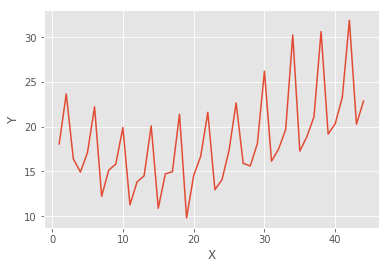

In [3]:
sns.lineplot(data=data, x='X', y='Y')

In [4]:
stan_model = """

data {
  int T;
  vector[T] Y;
}

parameters {
  vector[T] mu;
  vector[T] season;
  real<lower=0> s_mu;
  real<lower=0> s_season;
  real<lower=0> s_Y;
}

transformed parameters {
  vector[T] y_mean;
  y_mean = mu + season;
}

model {
  mu[2:T] ~ normal(mu[1:(T-1)], s_mu);
  for (t in 4:T){
    season[t] ~ normal(-sum(season[(t-3):(t-1)]), s_season);
  }
  Y ~ normal(y_mean, s_Y);
}

"""

In [5]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ac763fb582f23ed59eb5b5629beb6f74 NOW.


In [6]:
stan_data  ={}
stan_data['T'] = data.shape[0]
stan_data['Y'] = data['Y']

In [7]:
fit = sm.sampling(stan_data)

In [8]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_ac763fb582f23ed59eb5b5629beb6f74.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

              mean se_mean     sd   2.5%    25%     50%    75%  97.5%  n_eff   Rhat
mu[1]        18.42    0.01    0.6  17.24  18.02   18.43  18.82  19.56   2213    1.0
mu[2]        18.52  8.0e-3   0.46  17.58  18.22   18.53  18.82  19.39   3343    1.0
mu[3]         18.5  9.6e-3   0.48  17.59  18.19   18.49  18.81   19.5   2499    1.0
mu[4]        17.56  8.0e-3   0.44  16.67  17.28   17.57  17.84  18.41   2985    1.0
mu[5]        17.18  6.4e-3   0.42  16.34  16.92   17.18  17.44  18.01   4249    1.0
mu[6]         16.8  6.1e-3   0.42  15.96  16.53   16.79  17.06  17.62   4592    1.0
mu[7]        16.17  7.3e-3   0.42  15.34  15.91   16.17  16.44   17.0   3344    1.0
mu[8]        16.24  8.3e-3   0.43  15.42  15.95   16.23  16.51  17.14   2721    1.0
mu[9]         1

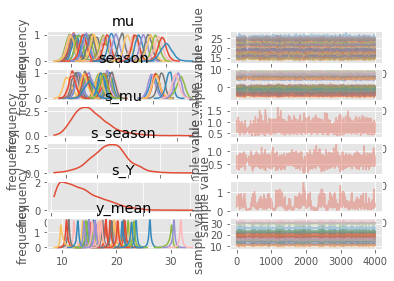

In [9]:
fig = fit.plot()

In [10]:
sample_y_mean = fit.extract('y_mean')['y_mean']
sample_mu = fit.extract('mu')['mu']
sample_season = fit.extract('season')['season']

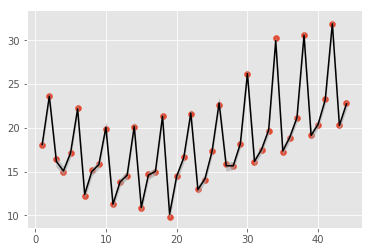

In [11]:
lower80, upper80 = mstats.mquantiles(sample_y_mean, [0.1, 0.9], axis=0)
plt.scatter(data['X'], data['Y'])
plt.fill_between(data['X'].unique(), lower80, upper80, alpha=0.6, color='darkgray')

x = data['X'].unique()
y = np.mean(sample_y_mean, axis=0)
plt.plot(x, y, color='black')

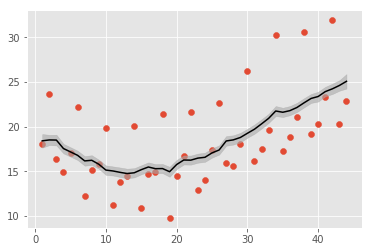

In [12]:
lower80, upper80 = mstats.mquantiles(sample_mu, [0.1, 0.9], axis=0)
plt.scatter(data['X'], data['Y'])
plt.fill_between(data['X'].unique(), lower80, upper80, alpha=0.6, color='darkgray')

x = data['X'].unique()
y = np.mean(sample_mu, axis=0)
plt.plot(x, y, color='black')

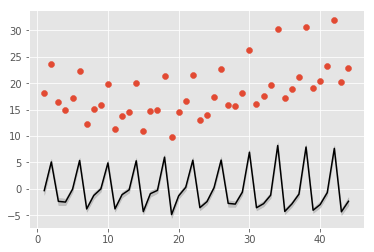

In [13]:
lower80, upper80 = mstats.mquantiles(sample_season, [0.1, 0.9], axis=0)
plt.scatter(data['X'], data['Y'])
plt.fill_between(data['X'].unique(), lower80, upper80, alpha=0.6, color='darkgray')

x = data['X'].unique()
y = np.mean(sample_season, axis=0)
plt.plot(x, y, color='black')